In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [5]:
?untar_data

In [6]:
?URLs

In [7]:
path = untar_data(URLs.PETS)
path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
path_anno = path/'annotations'
path_img = path/'images'

In [10]:
fname = get_image_files(path_img)
fname[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_61.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/newfoundland_108.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Russian_Blue_239.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/havanese_152.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Siamese_14.jpg')]

In [11]:
path_anno.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/trimaps'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/README'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/xmls'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/list.txt'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/test.txt'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/._trimaps')]

In [12]:
import re
np.random.seed(2)

In [13]:
string = fname[2]
string = str(string)
string

'/home/jupyter/.fastai/data/oxford-iiit-pet/images/Russian_Blue_239.jpg'

In [14]:
pat = r'/([^/]+)_\d+.jpg$'

In [15]:
re.search(pat,string)

<re.Match object; span=(49, 70), match='/Russian_Blue_239.jpg'>

In [16]:
re.search(pat,string).group(1)

'Russian_Blue'

In [17]:
data = ImageDataBunch.from_name_re(path_img, fname, pat, 
                                   ds_tfms=get_transforms(), 
                                   size=224, bs=bs)
data = data.normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
wheaten_terrier,newfoundland,Russian_Blue,chihuahua,havanese
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,miniature_pinscher,scottish_terrier,newfoundland,miniature_pinscher
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None

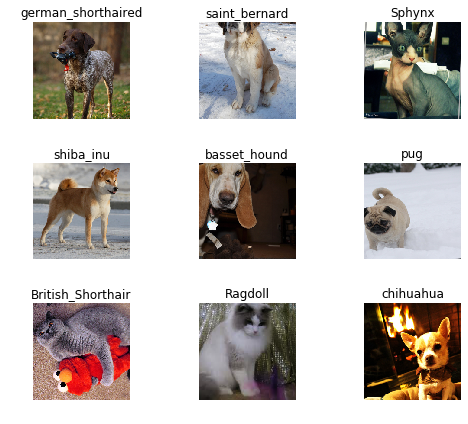

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [20]:
?cnn_learner

In [21]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [22]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [23]:
?learn.model

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.396675,0.366424,0.106225,00:59
1,0.548023,0.263539,0.079161,00:58
2,0.350000,0.236301,0.077131,00:43
3,0.254924,0.216692,0.073072,00:32


In [27]:
learn.save('stage-11')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

In [29]:
losses , indexes = interp.top_losses()
len(data.valid_ds) == len(losses) == len(indexes)

True

In [30]:
ClassificationInterpretation.plot_top_losses?

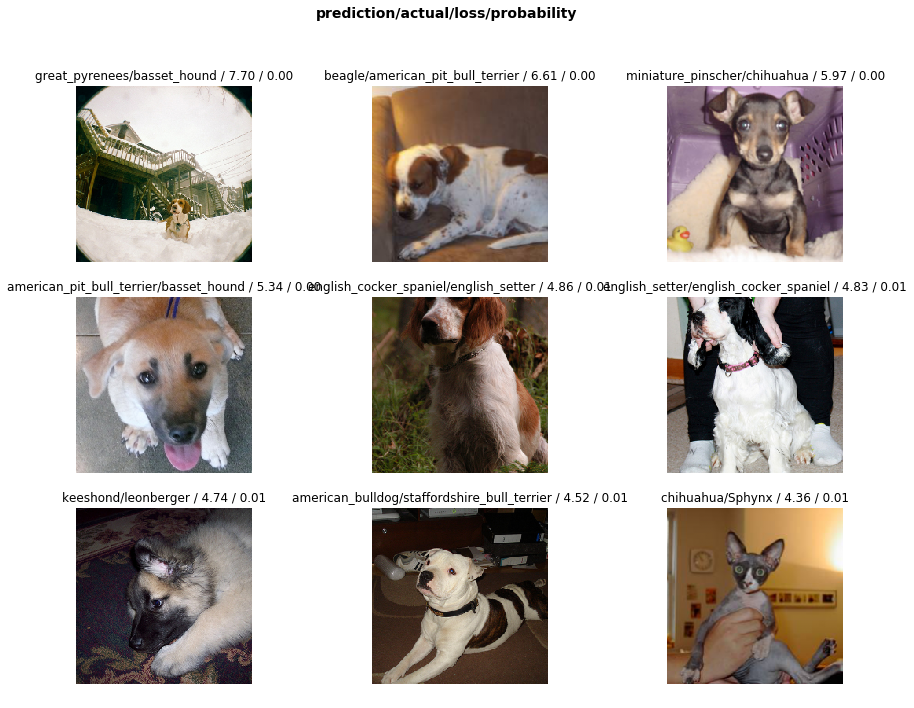

In [31]:
interp.plot_top_losses(9, figsize=(15,11), heatmap = False)

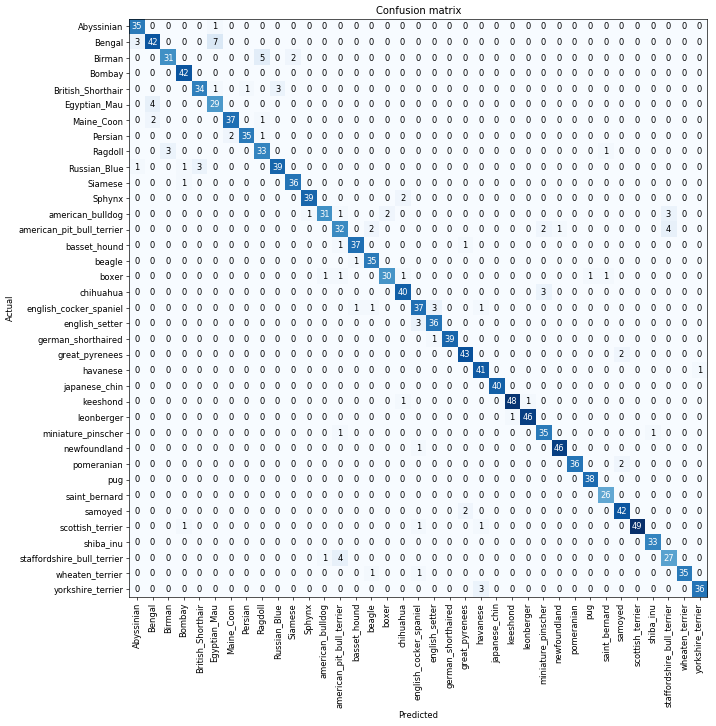

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [33]:
interp.most_confused(2)

[('Bengal', 'Egyptian_Mau', 7),
 ('Birman', 'Ragdoll', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Abyssinian', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Birman', 'Siamese', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_pit_bull_terrier', 'beagle', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('pomeranian', 'samoyed', 2),
 ('samoyed', 'great_pyrenees', 2)]

In [34]:
learn.unfreeze()

In [35]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.650795,0.644128,0.205683,00:40
1,0.378011,0.278241,0.090663,00:41


In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


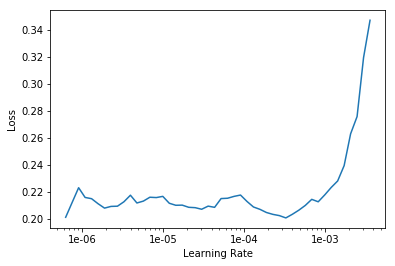

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.197492,0.237307,0.080514,00:39
